# Bigmart Outlet Sales Prediction

## =================== Libraries used =====================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

C:\Users\Shantanu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## ============== Data cleaning and prepration =============== 

In [2]:
# importing data

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


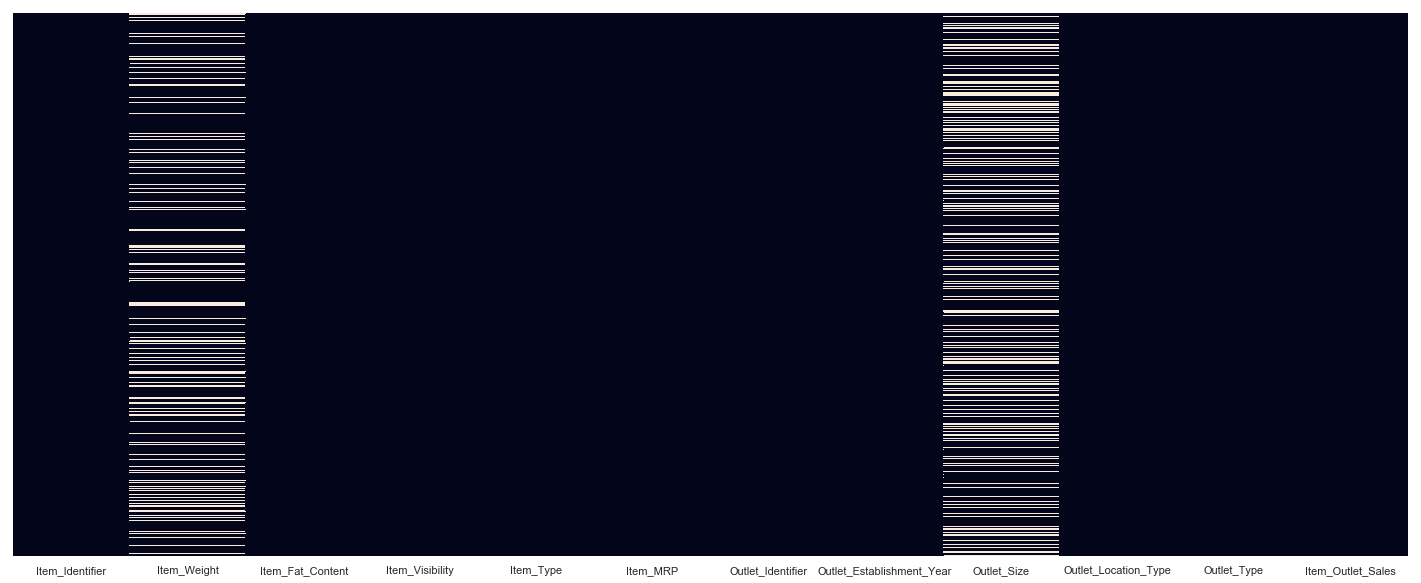

In [6]:
#examining null values

sns.set(rc={'figure.figsize':(25,10)})
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
#filling null values with mean/mode/median

train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode().iloc[0])

test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode().iloc[0])

In [12]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [14]:
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('low fat', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('LF', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('reg', 'Regular')

test.Item_Fat_Content = test.Item_Fat_Content.str.replace('low fat', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('LF', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('reg', 'Regular')

## ============= Exploratory data analysis ==============

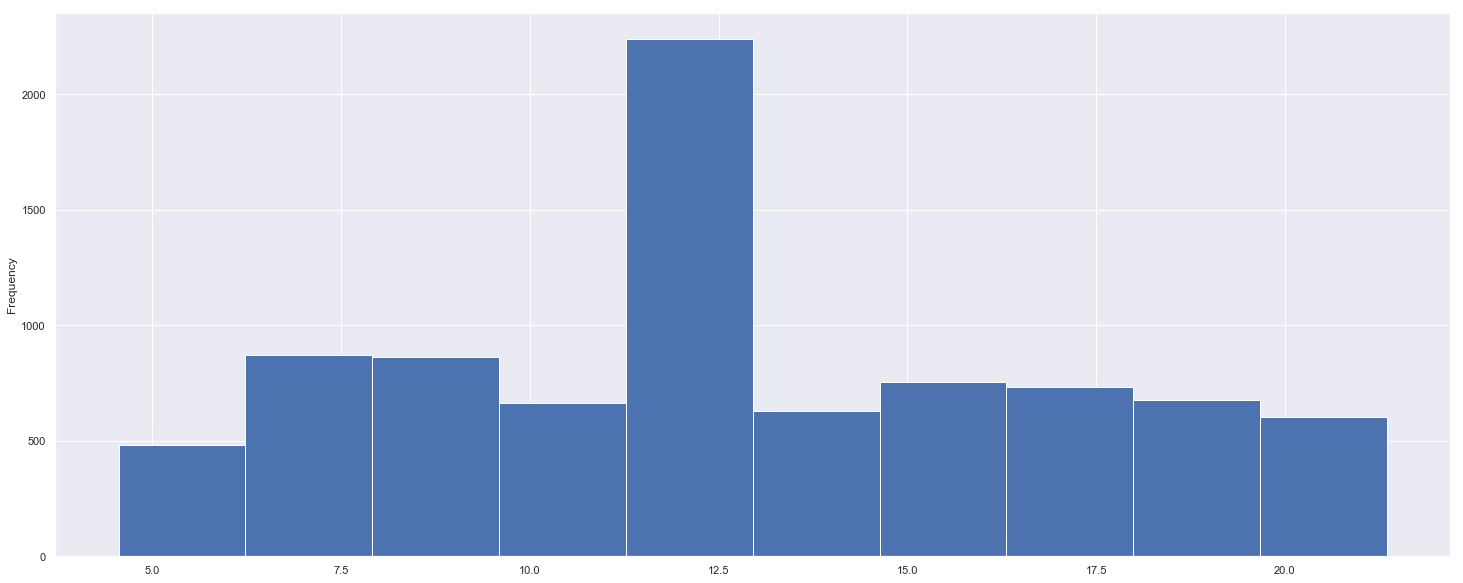

In [15]:
train.Item_Weight.plot(kind='hist')

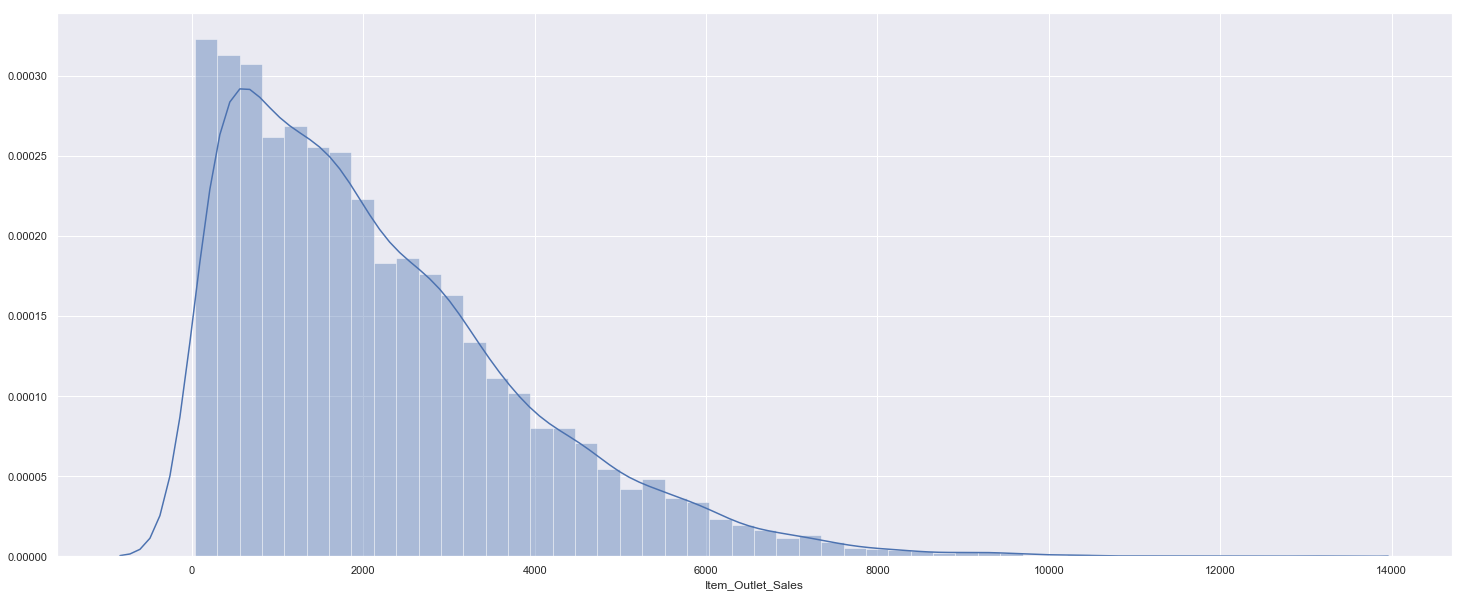

In [16]:
sns.distplot(train["Item_Outlet_Sales"])

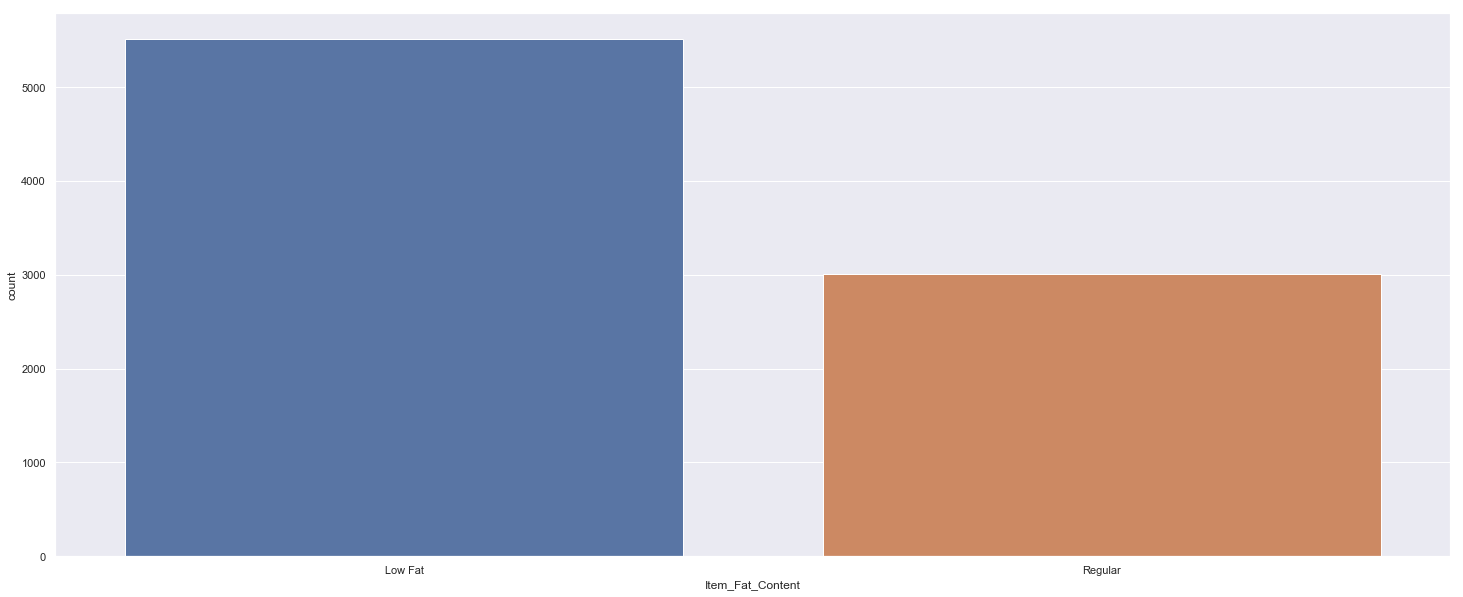

In [18]:
sns.countplot(x='Item_Fat_Content',data=train)

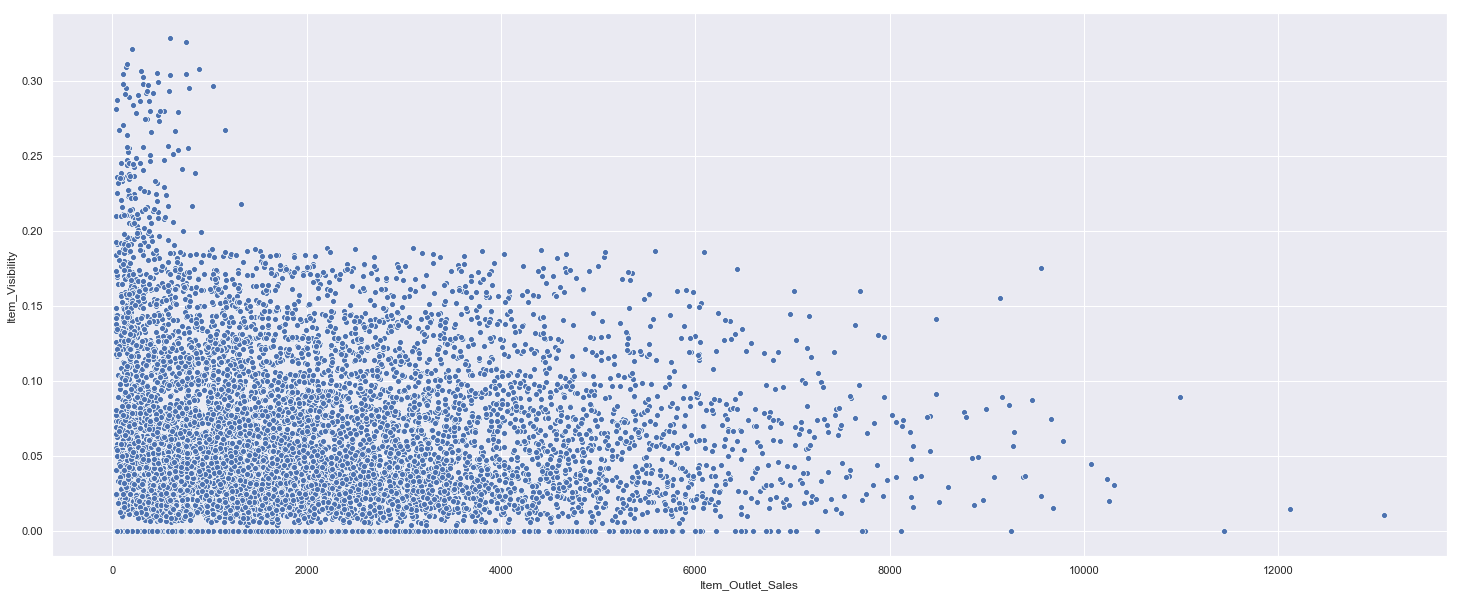

In [19]:
sns.scatterplot(x="Item_Outlet_Sales",y="Item_Visibility",data=train)

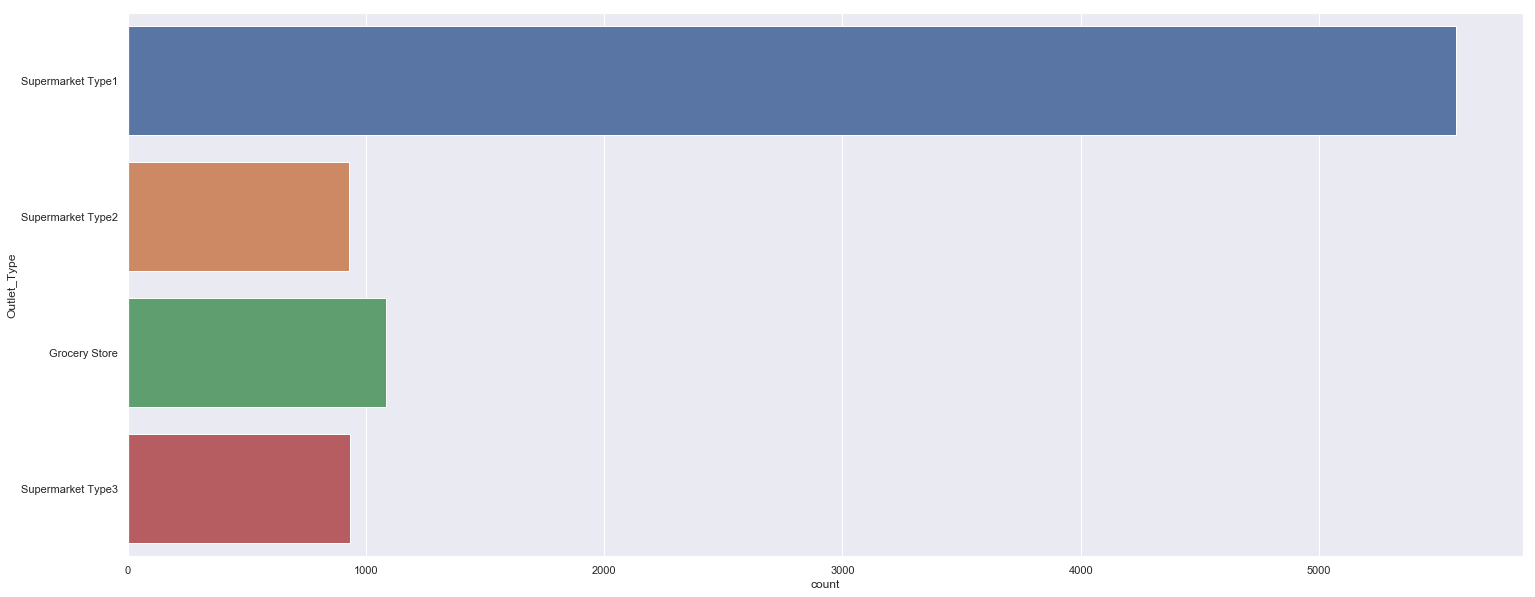

In [20]:
sns.countplot(y='Outlet_Type',data=train)

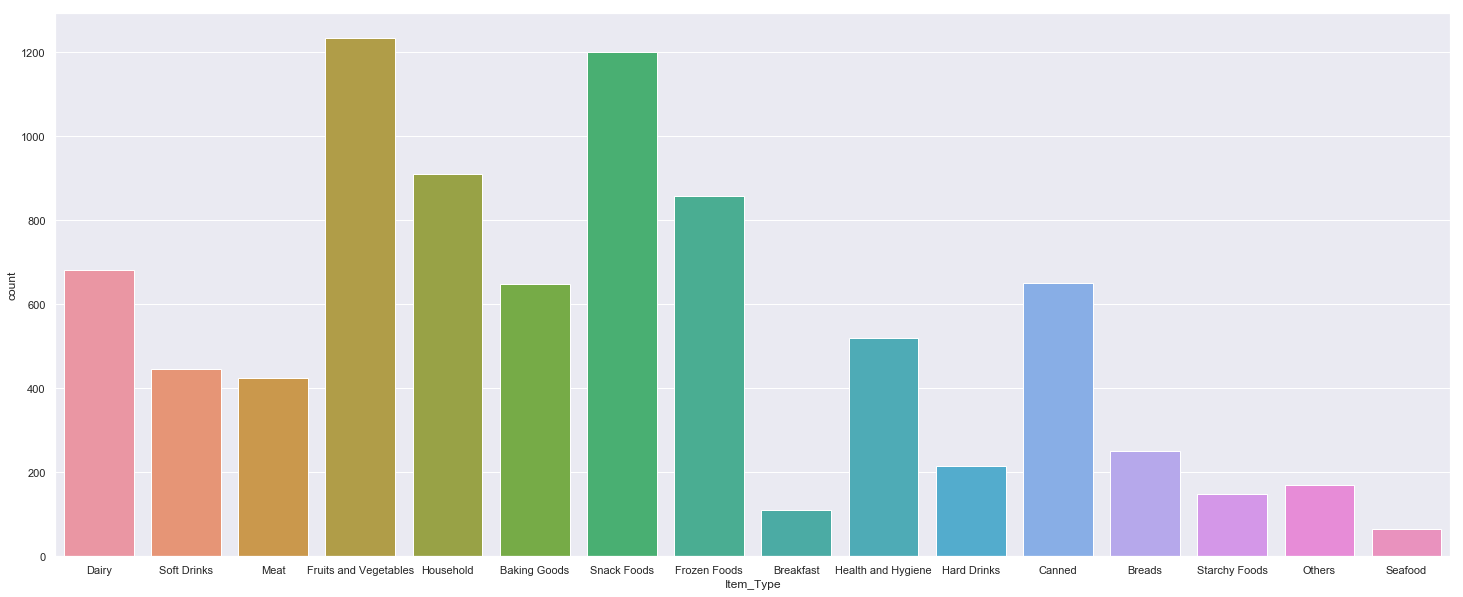

In [21]:
sns.countplot(x='Item_Type', data=train)

In [22]:
#feature extraction

def create_Category(data):
    if str(data['Item_Identifier']).startswith('NC'):
        return 'Non Consumable'
    elif str(data['Item_Identifier']).startswith('FD'):
        return 'Food'
    else:
        return 'Drinks'

train['Item_Category']= train.apply(create_Category,axis=1)
test['Item_Category']= test.apply(create_Category,axis=1)

train['Item_Category'].value_counts()

Food              6125
Non Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

In [23]:
#fat column correction

def FatCorrection(train):
    if train.Item_Category == "Non Consumable":
        return "No Fat"
    else:
        return train.Item_Fat_Content
    
train['Item_Fat_Content']= train.apply(FatCorrection,axis=1)
test['Item_Fat_Content']= test.apply(FatCorrection,axis=1)

train['Item_Fat_Content'].value_counts()

Low Fat    3918
Regular    3006
No Fat     1599
Name: Item_Fat_Content, dtype: int64

In [24]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [25]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,No Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumable


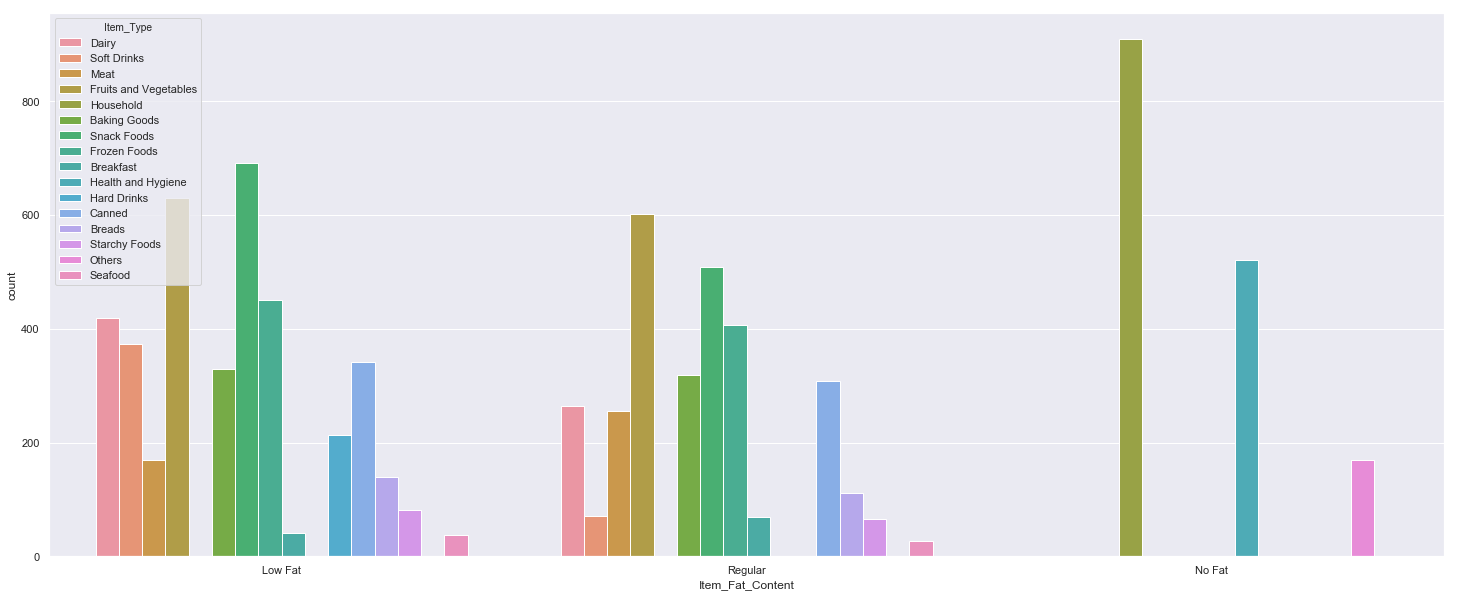

In [26]:
sns.countplot(x="Item_Fat_Content",hue="Item_Type",data=train)

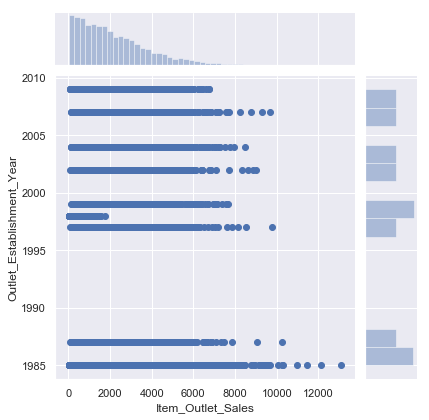

In [27]:
sns.jointplot(x="Item_Outlet_Sales",y="Outlet_Establishment_Year",data=train)

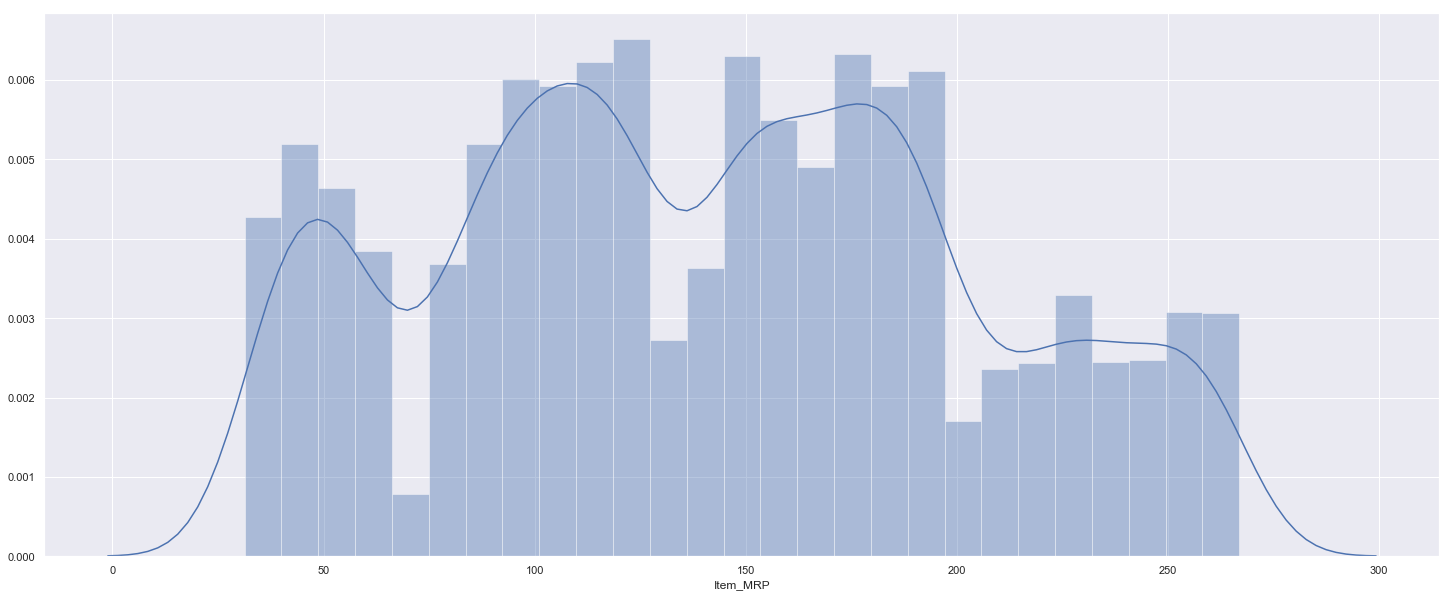

In [28]:
sns.distplot(train["Item_MRP"])

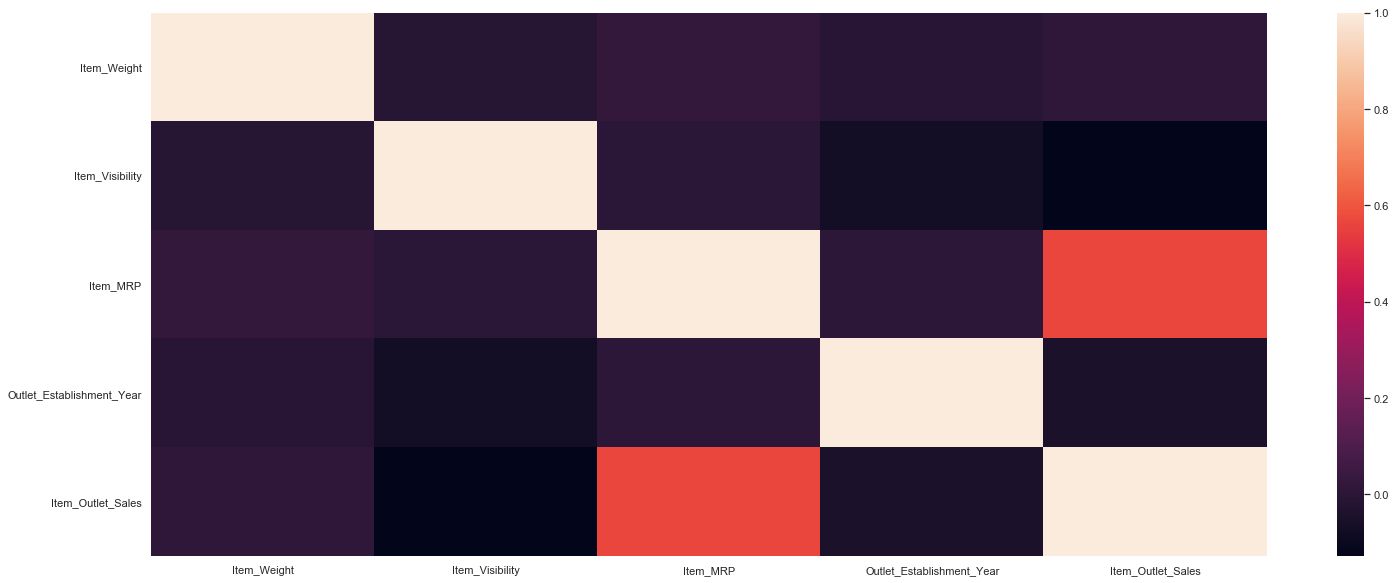

In [29]:
#finding correlation

sns.heatmap(train.corr(),)

In [30]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.930000,No Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumable
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Food
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Food
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Food
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,Food
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,Food


In [31]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
2,NCN55,14.600000,No Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Non Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,Food
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,Food
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Medium,Tier 2,Supermarket Type1,Food
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
Item_Category                5681 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 532.7+ KB


### As it seems there is no strong correlation visible in the data so we can not judge which features are important and which are not. So we need to consider almost all the features, that are given in the dataset, in our model

## =============== DATA PREPROCESSING ==============

In [35]:
#selecting training data

x = train.iloc[:,[1,2,3,4,5,8,9,10,12]]
y = train.iloc[:,-2].values
item_id = test.iloc[:,0]
outlet_id = test.iloc[:,6]
test = test.iloc[:,[1,2,3,4,5,8,9,10,11]]

In [36]:
# creating dummy variables
x = pd.get_dummies(x,drop_first=True).values
test = pd.get_dummies(test,drop_first=True).values

In [37]:
#selecting testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0)

# ============ Regression Model Building ============

## MultipleLinearRegression

In [38]:
regressor = LinearRegression(normalize=True)

In [39]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [40]:
y_pred = regressor.predict(x_test)

In [41]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

862.3254927822369
1336315.8883520705
1155.9913011576127


## SupportVectorRegression

In [52]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [53]:
y_train.shape

(5966,)

In [54]:
x_train1 = sc_x.fit_transform(x_train)
y_train1 = y_train.reshape((5966,1))
y_train1 = sc_y.fit_transform(y_train1)
y_train1 = y_train1.reshape(5966)

In [55]:
paramgrid1 = {"kernel":['linear', 'poly', 'rbf'],
              "degree":range(1,5,2),
             }
regressor1 = SVR()
regressor_grid1 = GridSearchCV(regressor1,paramgrid1,cv=5)
regressor_grid1.fit(x_train1,y_train1)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'degree': range(1, 5, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
#regressor1  = SVR()

In [57]:
#regressor1.fit(x_train1,y_train1)

In [58]:
y_pred1 = sc_y.inverse_transform(regressor_grid1.predict(sc_x.transform(x_test)))

In [59]:
print(mean_absolute_error(y_test, y_pred1))
print(mean_squared_error(y_test, y_pred1))
print(np.sqrt(mean_squared_error(y_test, y_pred1)))

806.8178515649865
1302111.1583002184
1141.1008536935806


## DecisionTreeRegression

In [60]:
paramgrid2 = {"criterion":["mae","mse"],
              "max_depth":range(1,10,1),
              "min_samples_leaf":range(1,5,1), 
             }
regressor2 = DecisionTreeRegressor()
regressor_grid0 = GridSearchCV(regressor2,paramgrid2,cv=5)
regressor_grid0.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mae', 'mse'], 'max_depth': range(1, 10), 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
#regressor2 = DecisionTreeRegressor(random_state=0,max_depth=5)

In [62]:
#regressor2.fit(x_train, y_train)

In [63]:
y_pred2 = regressor_grid0.predict(x_test)

In [64]:
print(mean_absolute_error(y_test, y_pred2))
print(mean_squared_error(y_test, y_pred2))
print(np.sqrt(mean_squared_error(y_test, y_pred2)))

791.7565988769051
1277150.6145438026
1130.1108859504905


## RandomForest

In [263]:
#paramgrid3 = {"n_estimators":[100],
#              "criterion":["mae","mse"],
#              "max_depth":range(1,5,1),
#              "min_samples_leaf":range(1,3,1),
#              
#             }
#regressor3 = RandomForestRegressor()
#regressor_grid3 = GridSearchCV(regressor3,paramgrid3,cv=5)
#regressor_grid3.fit(x_train,y_train)

In [264]:
#regressor3.fit(x_train,y_train)

In [265]:
#y_pred3 = regressor_grid.predict(x_test)

In [266]:
#print(mean_absolute_error(y_test, y_pred3))
#print(mean_squared_error(y_test, y_pred3))
#print(np.sqrt(mean_squared_error(y_test, y_pred3)))

# =======XG Boost =======

In [87]:
import xgboost as xgb
matrix = xgb.DMatrix(data=x_train,label=y_train)
tuned_params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5}

[13:27:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
tuned_cv_results_rmse = xgb.cv(dtrain=matrix,params=tuned_params, nfold=4,
                               num_boost_round=200,metrics="rmse",as_pandas=True, seed=123)

In [117]:
gbm_param_grid = {'learning_rate':[0.05,0.5,1],'n_estimators': [200],
                  'max_depth':[1,3,5],'subsample':[0.05,0.5,1],'n_jobs':[10],
                  'booster':['gbtree'],'min_child_weight':[1,3],'colsample_bytree':[0,1],
                  
                 }
gbm = xgb.XGBRegressor()

In [121]:
randomized_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
                                    scoring='neg_mean_squared_error', cv=4, verbose=1)


In [122]:
randomized_mse.fit(x_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
[14:11:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear i

[14:11:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:40] WARNI

[14:12:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:09] WARNI

[14:12:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:45] WARNI

[14:13:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:20] WARNI

[14:13:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:58] WARNI

[14:14:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:52] WARNI

[14:15:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:47] WARNI

[14:16:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:36] WARNI

[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  6.0min finished


[14:17:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.05, 0.5, 1], 'n_estimators': [200], 'max_depth': [1, 3, 5], 'subsample': [0.05, 0.5, 1], 'n_jobs': [10], 'booster': ['gbtree'], 'min_child_weight': [1, 3], 'colsample_bytree': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [123]:
pred = randomized_mse.predict(x_test)
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

802.7370624474622
1253307.869271064
1119.5123354707011


In [124]:
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ",np.sqrt(np.abs(randomized_mse.best_score_)))

Best parameters found:  {'booster': 'gbtree', 'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'n_jobs': 10, 'subsample': 1}
Lowest RMSE found:  1081.7924611265616


In [78]:
xg_reg = xgb.XGBRegressor(objective='reg:linear',n_estimators=100, seed=123)

In [79]:
xg_reg.fit(x_train, y_train)
y_pred4 = xg_reg.predict(x_test)

[13:19:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
print(mean_absolute_error(y_test, y_pred4))
print(mean_squared_error(y_test, y_pred4))
print(np.sqrt(mean_squared_error(y_test, y_pred4)))

799.890297313404
1252609.4529196925
1119.2003631699251


# ======NN======

In [174]:
x_train.shape

(5966, 29)

In [169]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization
from keras.layers import Dropout

In [252]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(512, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 512)               15360     
_________________________________________________________________
dense_84 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_85 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 513       
Total params: 541,185
Trainable params: 541,185
Non-trainable params: 0
_________________________________________________________________


In [253]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [254]:
NN_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 4772 samples, validate on 1194 samples
Epoch 1/100
4772/4772 [==============================] - 4s 741us/step - loss: 1137.8960 - mean_absolute_error: 1137.8960 - val_loss: 1017.3197 - val_mean_absolute_error: 1017.3197

Epoch 00001: val_loss improved from inf to 1017.31970, saving model to Weights-001--1017.31970.hdf5
Epoch 2/100
4772/4772 [==============================] - 2s 453us/step - loss: 1007.4898 - mean_absolute_error: 1007.4898 - val_loss: 1015.8069 - val_mean_absolute_error: 1015.8069

Epoch 00002: val_loss improved from 1017.31970 to 1015.80687, saving model to Weights-002--1015.80687.hdf5
Epoch 3/100
4772/4772 [==============================] - 2s 484us/step - loss: 1002.7215 - mean_absolute_error: 1002.7215 - val_loss: 1003.4465 - val_mean_absolute_error: 1003.4465

Epoch 00003: val_loss improved from 1015.80687 to 1003.44651, saving model to Weights-003--1003.44651.hdf5
Epoch 4/100
4772/4772 [==============================] - 2s 455us/step - loss: 996.2950 - me


Epoch 00066: val_loss did not improve from 746.70458
Epoch 67/100
4772/4772 [==============================] - 1s 282us/step - loss: 744.4464 - mean_absolute_error: 744.4464 - val_loss: 757.5493 - val_mean_absolute_error: 757.5493

Epoch 00067: val_loss did not improve from 746.70458
Epoch 68/100
4772/4772 [==============================] - 1s 278us/step - loss: 744.5825 - mean_absolute_error: 744.5825 - val_loss: 831.8707 - val_mean_absolute_error: 831.8707

Epoch 00068: val_loss did not improve from 746.70458
Epoch 69/100
4772/4772 [==============================] - 1s 282us/step - loss: 745.6072 - mean_absolute_error: 745.6072 - val_loss: 749.8106 - val_mean_absolute_error: 749.8106

Epoch 00069: val_loss did not improve from 746.70458
Epoch 70/100
4772/4772 [==============================] - 1s 282us/step - loss: 740.9428 - mean_absolute_error: 740.9428 - val_loss: 761.0577 - val_mean_absolute_error: 761.0577

Epoch 00070: val_loss did not improve from 746.70458
Epoch 71/100
4772/

In [255]:
wights_file = 'Weights-096--745.16801.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [256]:
predictions = NN_model.predict(x_test)

In [257]:
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(np.sqrt(mean_squared_error(y_test, predictions)))

774.6532070359762
1240774.6953830938
1113.900666748653


# Submission

In [81]:
sample = pd.read_csv('sample.csv')
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [258]:
pred = NN_model.predict(test)
pred = pred.reshape(5681)

In [259]:
from collections import OrderedDict
pred = np.array( pred )
submission = pd.DataFrame( OrderedDict( { 'Item_Identifier' : item_id, 'Outlet_Identifier' : outlet_id, 'Item_Outlet_Sales':pred } ) )

In [260]:
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv('sub.csv',index = False)